# Лекция 2: Библиотека `Pandas`

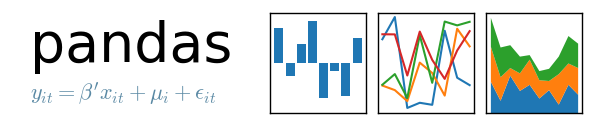

`Pandas` - надстройка над библиотекой `NumPy`, обеспечивающая удобную инфраструкутуру для обработки панельных данных (`Pandas` - от *panel data sets*). Основным классом `Pandas` является `DataFrame`, объекты `DataFrame` - многомерные массивы с метками для строк и столбцов, позволяющие хранить разнородные данные в различных столбцах и корректно работать с пропущенными данными. Кроме операций, поддерживаемых `Numpy`, библиотека `Pandas` реализует множество операций для работы с данными характерных для работы с электронными таблицами и базами данных.

In [29]:
import numpy as np
import pandas as pd

### Серии (`Series`) - одномерные массивы в Pandas

Фундаментальные структуры данных `Pandas` - классы: `Series`, `DataFrame` и `Index`.

Объект `Series` библиотеки `Pandas` — одномерный массив индексированных данных.

In [30]:
sr1 = pd.Series([5, 6, 2, 9, 12])
sr1

0     5
1     6
2     2
3     9
4    12
dtype: int64

In [31]:
sr1.values # aтрибут values содержит массив NumPy со значениями

array([ 5,  6,  2,  9, 12], dtype=int64)

In [32]:
sr1.index # index - массивоподобный объект типа pd.Index

RangeIndex(start=0, stop=5, step=1)

In [33]:
# Обращение к элементу серии по индексу:
sr1[2]

2

In [34]:
sr1[:3]

0    5
1    6
2    2
dtype: int64

Основное различие между объектом `Series` и одномерным массивом библиотеки `NumPy` - индекс, опредляющий доступ к данным массива. 

Индекс массива `NumPy` - всегда целочисленный и описывается неявно, индекс объекта `Series` описывается явно и связывается со значениями. Такой индекс может состоять из значений любого нужного типа, например строковых значений.

In [35]:
sr2 = pd.Series([5, 6, 2, 9, 12], index=['Cochise County', 'Pima County', 'Santa Cruz County', 
                                         'Maricopa County', 'Yuma County'])
sr2

Cochise County        5
Pima County           6
Santa Cruz County     2
Maricopa County       9
Yuma County          12
dtype: int64

In [36]:
# Обращение к элементу серии по не целочисленному индексу:
sr2['Pima County']

6

In [37]:
sr2['Pima County':]

Pima County           6
Santa Cruz County     2
Maricopa County       9
Yuma County          12
dtype: int64

Объект `Series` можно рассматривать как специализированный словарь. Словарь — структура, задающая соответствие произвольных ключей набору произвольных значений, а объект `Series` — структура, задающая соответствие типизированных ключей набору типизированных значений, кроме того для ключей (значений индекса) задана последовательность их следования. 

In [38]:
# объект Series можно создавать  непосредственно из словаря Python
sr3 = pd.Series({'California': 38332521,
                 'Texas': 26448193,
                 'New York': 19651127,
                 'Florida': 19552860,
                 'Illinois': 12882135})
sr3

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [39]:
# изменение индекса:
sr3.index = ["Cochice", "Pima", "Santa Cruz", "Maricopa", "Yuma"]
sr3

Cochice       38332521
Pima          26448193
Santa Cruz    19651127
Maricopa      19552860
Yuma          12882135
dtype: int64

### Датафрэйм (`DataFrame`) - двумерные массивы в `Pandas`

### Введение

`DataFrame` — аналог двумерного массива с гибкими индексами строк и гибкими именами столбцов. Аналогично тому, что двумерный массив можно рассматривать как упорядоченную последовательность выровненных столбцов, объект `DataFrame` 
можно рассматривать как упорядоченную последовательность выровненных объектов `Series`. Под «выровненными» имеется в виду то, что они используют один и тот же индекс.

In [40]:
# создание DataFrame на основе двух Series: 
s_population = pd.Series({'California': 38332521,
                 'Texas': 26448193,
                 'New York': 19651127,
                 'Florida': 19552860,
                 'Illinois': 12882135})
s_area = pd.Series({'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995})
states = pd.DataFrame({'population': s_population,
                               'area': s_area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [41]:
# вывод первых n значений (по умолчанию 5)
states.head(2)

,population,area
California,38332521,423967
Texas,26448193,695662


In [42]:
# вывод последних n значений
states.tail(3)

,population,area
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [43]:
# для всех столбцов DataFrame имеется единый индекс:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [44]:
# у объекта DataFrame есть атрибут columns, содержащий метки столбцов объект типа Index
states.columns

Index(['population', 'area'], dtype='object')

In [45]:
# DataFrame можно рассматривать как специализированный словарь столбцов. 
# DataFrame задает соответствие имени столбца объекту Series:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Важно понимать, что в `NumPy` элементы по оси 0 принято рассматривать как __строки__ (т.е. считается, что `np1[1]` - вернет строку с индексом 1), тогда как в `Pandas` аналогичная конструкция (`pd1[1]`) возвращает __столбец__ типа `Series`.

In [46]:
np1 = np.array([[1, 2, 3], [4, 5, 6]])
np1, np1.shape

(array([[1, 2, 3],
        [4, 5, 6]]), (2, 3))

In [47]:
np1[1] # строка с индексом 1

array([4, 5, 6])

In [49]:
# первое измерение (axis=0) рассматривается как размерность серий (столбцов), 
# а вторая - как их количество
pd1 = pd.DataFrame(data=np1) 
pd1

,0,1,2
0,1,2,3
1,4,5,6


In [50]:
pd1[1] # обращение к столбцу с именем (индексом) 1

0    2
1    5
Name: 1, dtype: int32

In [51]:
# создание DataFrame на базе массива NumPy с заданием индекса и имен столбцов
pd2 = pd.DataFrame(data=np1, index=['a', 'b'], columns=['cl1', 'cl2', 'cl3'] ) 
pd2

,cl1,cl2,cl3
a,1,2,3
b,4,5,6


In [52]:
pd2['cl2']

a    2
b    5
Name: cl2, dtype: int32

In [53]:
pd2['cl2']['a']

2

In [54]:
# создание DataFrame из списка словарей (ключи - имена столбцов):
pd3 = pd.DataFrame([{'a': 1, 'b': 2, 'c':'Alpha'}, {'a':0, 'b': 3, 'c': 'Betta'}])
pd3

,a,b,c
0,1,2,Alpha
1,0,3,Betta


In [55]:
# явное задание индекса:
pd3 = pd.DataFrame([{'a': 1, 'b': 2, 'c':'Alpha'}, {'a':0, 'b': 3, 'c': 'Betta'}], index=['first', 'second'])
pd3

,a,b,c
first,1,2,Alpha
second,0,3,Betta


In [56]:
# в Pandas допускаются пропуски данных:
pd3 = pd.DataFrame([{'a': 1, 'c':'Alpha'}, {'a':0, 'b': 3, 'c': 'Betta'}], index=['first', 'second'])
pd3

,a,b,c
first,1,NaN,Alpha
second,0,3.0,Betta


In [57]:
# создание DataFrame из словаря списков (ключи - имена столбцов):
data = {'county': ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3]}
pd4 = pd.DataFrame(data)
pd4

,county,year,reports
0,Cochice,2012,4
1,Pima,2012,24
2,Santa Cruz,2013,31
3,Maricopa,2014,2
4,Yuma,2014,3


In [58]:
# явное определение порядка и состава столбцов и индекса:
pd4 = pd.DataFrame(data, columns=['reports', 'county'], index=[chr(ord('a') + i) for i in range(5)])
pd4

,reports,county
a,4,Cochice
b,24,Pima
c,31,Santa Cruz
d,2,Maricopa
e,3,Yuma


#### Запись `DataFrame` во внешний файл

In [61]:
states.to_csv("states_1.csv", index = False, header = True)

#### Загрузка внешних данных в `DataFrame`

In [62]:
states1 = pd.read_csv("states_1.csv")
states1.head()

,population,area
0,38332521,423967
1,26448193,695662
2,19651127,141297
3,19552860,170312
4,12882135,149995


### Индексация

#### Индексация для серий

In [63]:
sr4 = pd.Series([0.25, 0.5, 0.75, 1.0], 
                index=['a', 'b', 'c', 'd'])
sr4

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

Серии поддерживают интерфейс близкий к словарям `Python`

In [67]:
# извлечение элемента серии по аналогии с использованием словаря:
sr4['b'] 

0.5

In [68]:
# аналогично словарям поддерживается проверка вхождения элемента в индекс серии:
'a' in sr4 

True

In [69]:
sr4.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [70]:
# в отличие от словарей keys() нужно указывать явно:
for i in sr4.keys():
    print(f'{i} -> {sr4[i]}')

a -> 0.25
b -> 0.5
c -> 0.75
d -> 1.0


In [71]:
# итерация по значениям, а не по ключам!
for i in sr4:
    print(f'{i}')

0.25
0.5
0.75
1.0


In [72]:
list(sr4.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [73]:
for i, v in sr4.items():
    print(f'{i} -> {v}')

a -> 0.25
b -> 0.5
c -> 0.75
d -> 1.0


In [74]:
# модификация (добавление) элемента серии:
sr4['e'] = 1.25
sr4

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [75]:
sr4['e'] = 1.75
sr4

a    0.25
b    0.50
c    0.75
d    1.00
e    1.75
dtype: float64

Индексы поддерживают операции над множествами:

In [76]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [77]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [78]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [79]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

Серии поддерживают механизмы индексации, аналогичные массивам `NumPy`: срезы, маскирование и прихотливое индексирование. 

In [80]:
# срез с использованием явных индексов:
sr4['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [81]:
# срез с использованием неявных индексов:
sr4[0:2]

a    0.25
b    0.50
dtype: float64

В слчае использования целочисленного индекса использование срезов может выглядеть неоднозначно и приводить к ошибкам.

In [82]:
sr5 = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])

In [83]:
# при обычном индексировании используется явный индекс
sr5[1]

'a'

In [84]:
# при использовании среза используется неявный индекс:
sr5[1:3] # этот результат может противоречить ожидаемому

3    b
5    c
dtype: object

Из-за этой потенциальной путаницы в случае целочисленных индексов в библиотеке `Pandas` предусмотрены специальные атрибуты-индексаторы, позволяющие явным образом применять определенные схемы индексации:
* атрибут `loc` позволяет выполнить индексацию и срезы с использованием явного индекса
* атрибут `iloc` дает возможность выполнить индексацию и срезы, применяя неявный индекс в стиле языка `Python`

In [85]:
sr5.loc[1] # явный индекс

'a'

In [86]:
sr5.iloc[1] # неявный индекс

'b'

In [87]:
sr5.loc[1:3]

1    a
3    b
dtype: object

In [88]:
sr5.iloc[1:3]

3    b
5    c
dtype: object

In [89]:
# Применение маскирования для серий аналогично NumPy:
sr4[(sr4 > 0.3) & (sr4 < 0.8)]

b    0.50
c    0.75
dtype: float64

In [90]:
# Прихотливое индексирование:
sr4[['a', 'e']]

a    0.25
e    1.75
dtype: float64

#### Индексация для DataFrame

In [91]:
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


`DataFrame` может рассматриваться как словарь поименованных серий

In [92]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [93]:
# для имен столбцов, не конфликтующих с методами DataFrame и синтаксисом Python допустим такой синтаксис:
states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [94]:
# синтаксис словаря допустим и для присвоения (создания новой серии-столбца):
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


Операции среза и маскирования относятся к строкам (!), а не столбцам (это не очень логично, но удобно на практике)

In [95]:
states[:'New York'] # прия явном использовании индекса правая граница включается!

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746


In [96]:
states[:3] # прия неявном использовании индекса граница не включается

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746


In [97]:
# маскирование работает по строкам:
states[states.density > 100]

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


`DataFrame` поддерживает двухмерный вариант `loc`, `iloc`

In [98]:
states.loc[states.density > 100, ['population', 'density']]

,population,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [99]:
states.iloc[0, 2] = 90
states

,population,area,density
California,38332521,423967,90.000000
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


### Мультииндексация

In [125]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [126]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [127]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [128]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [129]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [130]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [131]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [132]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [187]:
# наш индекс - мультииндекс
type(pop_df.index)

pandas.core.indexes.multi.MultiIndex

In [188]:
# он имеет 2 уровня вложенности
len(pop_df.index.levels)

2

In [189]:
# каждый уровень индекса - это индекс
pop_df.index.levels[0]

Index(['California', 'New York', 'Texas'], dtype='object')

In [191]:
# значения в уровне индекса 0
pop_df.index.get_level_values(0)

Index(['California', 'California', 'New York', 'New York', 'Texas', 'Texas'], dtype='object')

In [192]:
pop_df.xs('California')

,total,under18
2000,33871648,9267089
2010,37253956,9284094


In [133]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.377787  0.826669
  2  0.076724  0.292770
b 1  0.815410  0.715836
  2  0.971903  0.035639

In [134]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [135]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  37.9  41.0  36.8  46.0  36.6
     2      38.0  38.3  44.0  38.1  48.0  35.6
2014 1      37.0  36.6  35.0  36.8  36.0  36.6
     2      27.0  35.7  29.0  37.5  26.0  36.3

In [137]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      41.0  36.8
     2      44.0  38.1
2014 1      35.0  36.8
     2      29.0  37.5

In [138]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        39.0
      2        38.0
2014  1        37.0
      2        27.0
Name: (Bob, HR), dtype: float64

In [139]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,39.0,41.0,46.0
2014,1,37.0,35.0,36.0


### Обработка данных в библиотеке `Pandas`

Все универсальные функции библиотеки `NumPy` работают с объектами `Series` и `DataFrame` библиотеки `Pandas`. 

In [109]:
rs = np.random.RandomState(42)
sr6 = pd.Series(rs.randint(0, 10, 4))
sr6

0    6
1    3
2    7
3    4
dtype: int32

Результатом применения универсальной функции `NumPy` к объектам `Pandas` будет новый объект с сохранением индексов

In [110]:
sr7 = np.exp(sr6)
sr7

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [111]:
sr6 # исходная серия осталась неизменной

0    6
1    3
2    7
3    4
dtype: int32

In [112]:
pd5 = pd.DataFrame(rs.randint(0, 10, (3, 4)), 
                  columns=['A', 'B', 'C', 'D'])
pd5

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [113]:
np.sin(pd5 * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


При бинарных операциях над двумя объектами `Series` или `DataFrame` библиотека `Pandas` будет выравнивать индексы в процессе выполнения операции. Получившийся в итоге массив содержит объединение индексов двух исходных массивов. Недостающие значения будут отмечены как `NaN` («нечисловое значение»), с помощью которого библиотека `Pandas` отмечает пропущенные данные.

In [114]:
pd6 = pd.DataFrame(rs.randint(0, 10, (4, 4)), index=list(range(1, 5)),
                  columns=['B', 'C', 'D', 'F'])
pd6

,B,C,D,F
1,1,7,5,1
2,4,0,9,5
3,8,0,9,2
4,6,3,8,2


In [115]:
sr8 = pd5['A'] + pd6['B'] # выполняется выравнивание по индексам (участвуют две серии)
sr8

0     NaN
1     8.0
2    11.0
3     NaN
4     NaN
dtype: float64

In [116]:
pd7 = pd5 + pd6 # выполняется выравнивание по столбцам и по индексам
pd7

,A,B,C,D,F
0,NaN,NaN,NaN,NaN,NaN
1,NaN,5.0,10.0,12.0,NaN
2,NaN,6.0,5.0,13.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


### Работа с пустыми значениями

В Pandas в качестве пустых значений рассматривается значение *"Not a number"*, поддерживаемое форматом чисел с плавающей точкой (`np.nan` в NumPy) и значением `None` для объектов Python.

In [117]:
sr8

0     NaN
1     8.0
2    11.0
3     NaN
4     NaN
dtype: float64

In [118]:
# получение маски пустых значений
sr8.isna()

0     True
1    False
2    False
3     True
4     True
dtype: bool

In [119]:
pd7.isna()

,A,B,C,D,F
0,True,True,True,True,True
1,True,False,False,False,True
2,True,False,False,False,True
3,True,True,True,True,True
4,True,True,True,True,True


In [120]:
# очистка от пустых значений:
sr8.dropna()

1     8.0
2    11.0
dtype: float64

In [121]:
pd7.dropna() # default how='any'

,A,B,C,D,F


In [122]:
pd7.dropna(how='all')

,A,B,C,D,F
1,NaN,5.0,10.0,12.0,NaN
2,NaN,6.0,5.0,13.0,NaN


In [123]:
pd7.dropna(how='all').dropna(axis=1) # default axis=0, т.е. удаляются строки

,B,C,D
1,5.0,10.0,12.0
2,6.0,5.0,13.0


In [124]:
pd7.fillna(0.0) # заполнение NaN заданными значениями

,A,B,C,D,F
0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.0,10.0,12.0,0.0
2,0.0,6.0,5.0,13.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


### Агергирование и группировка

In [142]:
pd75 = pd.DataFrame({'A': rs.rand(5), 'B': rs.rand(5)})
pd75

,A,B
0,0.859940,0.563288
1,0.680308,0.385417
2,0.450499,0.015966
3,0.013265,0.230894
4,0.942202,0.241025


In [143]:
pd75.mean()

A    0.589243
B    0.287318
dtype: float64

In [144]:
pd75.mean(axis=1)

0    0.711614
1    0.532862
2    0.233233
3    0.122079
4    0.591614
dtype: float64

In [145]:
pd.DataFrame({'sum': pd75.sum(), 'prod': pd75.prod(), 
              'mean': pd75.mean(), 'median': pd75.median(), 'std': pd75.std(), 'var': pd75.var(),
              'min': pd75.min(), 'max': pd75.max()})

,sum,prod,mean,median,std,var,min,max
A,2.946214,0.003294,0.589243,0.680308,0.373212,0.139288,0.013265,0.942202
B,1.436590,0.000193,0.287318,0.241025,0.202942,0.041185,0.015966,0.563288


In [146]:
pd75.describe()

,A,B
count,5.000000,5.000000
mean,0.589243,0.287318
std,0.373212,0.202942
min,0.013265,0.015966
25%,0.450499,0.230894
50%,0.680308,0.241025
75%,0.859940,0.385417
max,0.942202,0.563288


### Объединение наборов данных

In [147]:
pd8 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
pd8

,A,B
0,1,2
1,3,4


In [148]:
pd9 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
pd9

,A,B
0,5,6
1,7,8


In [149]:
# append создает новый объект DataFrame:
pd8.append(pd9) # при конкатенации может происходить дублирование индекса

,A,B
0,1,2
1,3,4
0,5,6
1,7,8


In [150]:
# создается новый индекс:
pd8.append(pd9, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


Функция `pd.merge()` реализует множество типов соединений: «один-к-одному», «многие-к-одному» и «многие-ко-многим». Все эти три типа соединений доступны через один и тот же вызов `pd.merge()`, тип выполняемого соединения зависит от формы входных данных. 

In [151]:
pd10 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
pd11 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [152]:
pd10

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [153]:
pd11

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [154]:
# Функция pd.merge() распознает, что в обоих объектах DataFrame имеется столбец 
# employee, и автоматически выполняет соединение один-к-одному, используя этот столбец в качестве ключа.
pd.merge(pd10, pd11)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [155]:
pd12 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                           'supervisor': ['Carly', 'Guido', 'Steve']})
pd12

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [156]:
# соединение многие-к-одному по столбцу group:
pd.merge(pd10, pd12)

,employee,group,supervisor
0,Bob,Accounting,Carly
1,Jake,Engineering,Guido
2,Lisa,Engineering,Guido
3,Sue,HR,Steve


In [157]:
pd13 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                           'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
pd13

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [158]:
# соединение многие-ко-многим по столбцу group:
pd.merge(pd10, pd13)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


Метод `pd.merge()` по умолчанию выполняет поиск в двух входных объектах соответствующих названий столбцов и использует найденное в качестве ключа. Однако зачастую имена столбцов не совпадают, для этого случая в методе `pd.merge()` имеются специальные параметры.

* `on` для явного указания имени (имен) столбцов;
* `left_on` и `right_on` для явного указания имен столбцов, в случае, если у первого и второго DataFrame они не совпадают;
* `left_index` и `right_index` для указания индекса в качестве ключа слияния.

In [159]:
# пример:
pd14 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
pd15 = pd.merge(pd10, pd14, left_on='employee', right_on='name')
pd15

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [160]:
# лишний столбец можно удалить:
pd15.drop('name', axis=1, inplace=True)
pd15

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### `GroupBy`: разбиение, применение, объединение

Операцию `GroupBy` удобно представить в виде последовательного примерения операций: разбиение, применение и объединение (`split -> apply -> combine`).

* Шаг **разбиения** включает разделение на части и группировку объекта `DataFrame` на основе значений заданного ключа.
* Шаг **применения** включает вычисление какой-либо функции, обычно агрегирующей, преобразование или фильтрацию в пределах отдельных групп.
* На шаге **объединения** выполняется слияние результатов этих операций в выходной массив.

Пример разбиения, применения, объединения:

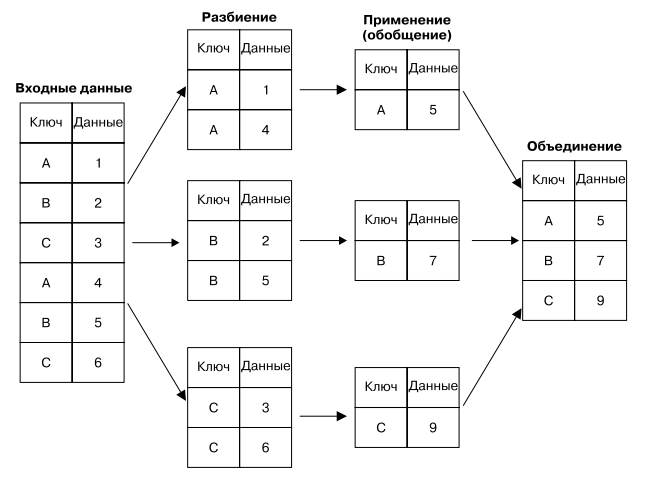

Для `DataFrame` операцию *«разбить, применить, объединить»* можно реализовать с помощью метода `groupby()`, передав в него имя желаемого ключевого столбца. Функция `groupby()` возвращает не набор объектов `DataFrame`, а объект `DataFrameGroupBy`, который можно рассматривать как специальное представление объекта `DataFrame`, готовое к группировке, но не выполняющее никаких фактических вычислений до этапа применения агрегирования (используется принцип отложенного вычисления). Для получения результата нужно вызвать один из агрегирующих методов объекта `DataFrameGroupBy`, что приведет к выполнению соответствующих шагов применения/объединения.

In [161]:
pd16 = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(1, 7)}, columns=['key', 'data'])

In [162]:
pd16.groupby('key')

In [163]:
pd16.groupby('key').sum()

,data
key,
A,5
B,7
C,9


In [164]:
# загружаем набор данных об открытии экзопланет:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [165]:
# заголовок таблицы
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [166]:
# подсчтываем количество не NaN значений в каждой группе:
planets.groupby('year').count()

,method,number,orbital_period,mass,distance
year,,,,,
1989,1,1,1,1,1
1992,2,2,2,0,0
1994,1,1,1,0,0
1995,1,1,1,1,1
1996,6,6,6,4,6
1997,1,1,1,1,1
1998,5,5,5,5,5
1999,15,15,15,14,15
2000,16,16,16,14,16


In [167]:
# группировка экзопланет по методу их идентификации:
planets.groupby('method').count()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


In [168]:
# сколько орбитальных периодов было обнаружено каждым из методов:
planets.groupby('method')['orbital_period'].count()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           12
Microlensing                       7
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          3
Name: orbital_period, dtype: int64

In [169]:
# медианное значение орбитальных периодов (в днях), выявленных каждым из методов:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [170]:
# по группам, выделенным с помощью groupby, можно итерироваться:
for (method, group) in planets.groupby('method'): # тип group - DataFrame
    print(f"{method} shape={group.shape}")

Astrometry shape=(2, 6)
Eclipse Timing Variations shape=(9, 6)
Imaging shape=(38, 6)
Microlensing shape=(23, 6)
Orbital Brightness Modulation shape=(3, 6)
Pulsar Timing shape=(5, 6)
Pulsation Timing Variations shape=(1, 6)
Radial Velocity shape=(553, 6)
Transit shape=(397, 6)
Transit Timing Variations shape=(4, 6)


На этапе применения у объектов `GroupBy` кроме обычных агрегирующих методов, таких как `sum()`, `median()` и т. п., имеются методы `aggregate()`, `filter()`, `transform()` и `apply()`, эффективно выполняющие множество полезных операций до объединения сгруппированных данных.

Метод `aggregate()` может принимать на входе строку, функцию или список и вычислять все сводные показатели сразу.

In [171]:
planets.groupby('method')['orbital_period'].aggregate(['min', np.median, max])

,min,median,max
method,,,
Astrometry,246.360000,631.180000,1016.000000
Eclipse Timing Variations,1916.250000,4343.500000,10220.000000
Imaging,4639.150000,27500.000000,730000.000000
Microlensing,1825.000000,3300.000000,5100.000000
Orbital Brightness Modulation,0.240104,0.342887,1.544929
Pulsar Timing,0.090706,66.541900,36525.000000
Pulsation Timing Variations,1170.000000,1170.000000,1170.000000
Radial Velocity,0.736540,360.200000,17337.500000
Transit,0.355000,5.714932,331.600590


Операция фильтрации `filter` дает возможность опускать данные в зависимости от свойств группы. Например, нам может понадобиться оставить в результате 
все группы

In [172]:
def filter_func(x):
    return x['orbital_period'].max() / x['orbital_period'].min() > 1000

In [173]:
gr1 = planets.groupby('method').filter(filter_func)
gr1.shape

(558, 6)

В то время как агрегирующая функция должна возвращать сокращенную версию данных, преобразование `transform` может вернуть версию полного набора данных, преобразованную ради дальнейшей их перекомпоновки. При подобном преобразовании форма выходных данных совпадает с формой входных. Распространенный пример — центрирование данных путем вычитания среднего значения по группам.

In [174]:
planets['cntr_orbital_period'] = planets.groupby('method')['orbital_period'].transform(lambda x: x - x.mean())
planets

,method,number,orbital_period,mass,distance,year,cntr_orbital_period
0,Radial Velocity,1,269.300000,7.100,77.40,2006,-554.054680
1,Radial Velocity,1,874.774000,2.210,56.95,2008,51.419320
2,Radial Velocity,1,763.000000,2.600,19.84,2011,-60.354680
3,Radial Velocity,1,326.030000,19.400,110.62,2007,-497.324680
4,Radial Velocity,1,516.220000,10.500,119.47,2009,-307.134680
5,Radial Velocity,1,185.840000,4.800,76.39,2008,-637.514680
6,Radial Velocity,1,1773.400000,4.640,18.15,2002,950.045320
7,Radial Velocity,1,798.500000,NaN,21.41,1996,-24.854680
8,Radial Velocity,1,993.300000,10.300,73.10,2008,169.945320
9,Radial Velocity,2,452.800000,1.990,74.79,2010,-370.554680


Метод `apply()` позволяет применять произвольную функцию к результатам группировки. В качестве параметра эта функция должна получать объект `DataFrame`, а возвращать или объект библиотеки `Pandas` (например, `DataFrame`, `Series`), или скалярное значение, в зависимости от возвращаемого значения будет вызвана соответствующая операция объединения.

In [175]:
def norm_by_min_in_year(x):
            # x – объект DataFrame сгруппированных значений
            x['orbital_period_normalized'] = x['orbital_period'] / x['orbital_period'].min()
            return x 

In [176]:
planets.groupby('year').apply(norm_by_min_in_year)

,method,number,orbital_period,mass,distance,year,cntr_orbital_period,orbital_period_normalized
0,Radial Velocity,1,269.300000,7.100,77.40,2006,-554.054680,149.944321
1,Radial Velocity,1,874.774000,2.210,56.95,2008,51.419320,801.498594
2,Radial Velocity,1,763.000000,2.600,19.84,2011,-60.354680,8411.765050
3,Radial Velocity,1,326.030000,19.400,110.62,2007,-497.324680,249.604610
4,Radial Velocity,1,516.220000,10.500,119.47,2009,-307.134680,654.403935
5,Radial Velocity,1,185.840000,4.800,76.39,2008,-637.514680,170.273121
6,Radial Velocity,1,1773.400000,4.640,18.15,2002,950.045320,1463.299236
7,Radial Velocity,1,798.500000,NaN,21.41,1996,-24.854680,240.983854
8,Radial Velocity,1,993.300000,10.300,73.10,2008,169.945320,910.096269
9,Radial Velocity,2,452.800000,1.990,74.79,2010,-370.554680,373.325067


## Сводные таблицы (`Pivot Tables`)

*Сводная таблица (англ. `Pivot table`)* — инструмент обработки данных, служащий для их обобщения. Сводная таблица получает на входе простые данные в виде столбцов и группирует записи в двумерную таблицу, обеспечивающую многомерное представление данных. Различие между сводными таблицами и операцией GroupBy иногда неочевидно. Сводная таблица представляет собой многомерную версию агрегирующей функции `GroupBy`. То есть вы выполняете операцию «разбить, применить, объединить», но как разбиение, так и объединение происходят не на одномерном индексе, а на двумерной координатной сетке.

In [177]:
# загружаем датасет
titanic = sns.load_dataset('titanic')

In [178]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [179]:
# посмотрим на коэффициент выживаемости в зависимости от пола
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Однако хотелось бы заглянуть немного глубже и увидеть распределение выживших по полу и классу. Говоря языком `GroupBy`, можно было бы идти следующим путем: сгруппировать по классу и полу, выбрать выживших, применить агрегирующую функцию среднего значения, объединить получившиеся группы, после чего выполнить операцию unstack иерархического индекса, чтобы обнажить скрытую многомерность.

In [180]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Двумерный `GroupBy` встречается настолько часто, что в состав библиотеки Pandas был включен удобный метод, `pivot_table`, позволяющий описывать более кратко данную разновидность многомерного агрегирования.

In [181]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Группировку в сводных таблицах, как и при операции `GroupBy`, можно задавать на нескольких уровнях и с множеством параметров. Например, интересно взглянуть на возраст в качестве третьего измерения. Разобьем данные на интервалы по возрасту с помощью функции `pd.cut`:

In [182]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Мы можем применить ту же стратегию при работе со столбцами. Добавим сюда информацию о стоимости билета, воспользовавшись функцией `pd.qcut` для автоматического вычисления квантилей:

In [183]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [185]:
# Ключевое слово aggfunc управляет тем, какой тип агрегирования применяется (по умолчанию - среднее значение)
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [186]:
# Иногда бывает полезно вычислять итоги по каждой группе. Это можно сделать с помощью ключевого слова margins:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Rolling Operations

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

```DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)```

In [193]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [194]:
# Rolling sum with a window length of 2, using the ‘triang’ window type.
df.rolling(2, win_type='triang').sum()

,B
0,NaN
1,0.5
2,1.5
3,NaN
4,NaN


In [195]:
df.rolling(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN


In [196]:
df.rolling(2, min_periods=1).sum()

,B
0,0.0
1,1.0
2,3.0
3,2.0
4,4.0


In [198]:
>>> df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
...                   index = [pd.Timestamp('20130101 09:00:00'),
...                            pd.Timestamp('20130101 09:00:02'),
...                            pd.Timestamp('20130101 09:00:03'),
...                            pd.Timestamp('20130101 09:00:05'),
...                            pd.Timestamp('20130101 09:00:06')])
df

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


In [199]:
df.rolling('2s').sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0
